In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from __future__ import annotations

import logging
import os

import numpy as np

from mhsxtrapy.b3d import WhichSolution
from mhsxtrapy.field2d import (
    Field2dData,
    FluxBalanceState,
    alpha_HS04,
    check_fluxbalance,
)
from mhsxtrapy.field3d import Field3dData, calculate_magfield
from mhsxtrapy.plotting.vis import (
    plot_ddensity_xy,
    plot_ddensity_z,
    plot_dpressure_xy,
    plot_dpressure_z,
    plot_magnetogram_2D,
    plot_magnetogram_3D,
)
from mhsxtrapy.prep import find_corners_SolarOrbiter

The following packages are not installed:
['mpl-animators>=1.0.0', 'reproject>=0.9.0']
To install sunpy with these dependencies use `pip install sunpy[map]` or `pip install sunpy[all]` for all extras. 
If you installed sunpy via conda, please report this to the community channel: https://matrix.to/#/#sunpy:openastronomy.org [sunpy.util.sysinfo]
The following packages are not installed:
['mpl-animators>=1.0.0']
To install sunpy with these dependencies use `pip install sunpy[visualization]` or `pip install sunpy[all]` for all extras. 
If you installed sunpy via conda, please report this to the community channel: https://matrix.to/#/#sunpy:openastronomy.org [sunpy.util.sysinfo]
/Users/lilli/Library/Caches/pypoetry/virtualenvs/mhsxtrapy-_witMKZG-py3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Example for magnetic field extrapolation from Solar Orbiter/PHI data and demonstration of saving and loading of a Field3dData object

##### Read Solar Orbiter/PHI/HRT file

Solar Orbiter PHI/HRT magnetogram from 29 March 2023 saved in folder EXAMPLE-Solar-Orbiter/data.
Originally downloaded from Solar Orbiter Archive, for details see https://soar.esac.esa.int/soar/.

In [3]:
path = "data/solo_L2_phi-hrt-blos_20230329T125009_V01.fits"

##### Determine 2D boundary condition 

Full Solar Orbiter/PHI/HRT magnetogram is displayed together with the cut out one gets when chooseing stx (start x index), lstx (last x index), sty (start y index) and lsty (last y index).

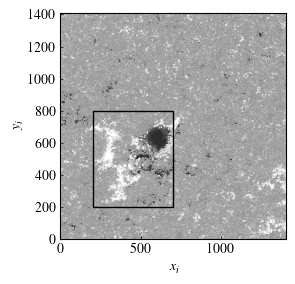

In [4]:
find_corners_SolarOrbiter(path, stx=200, lstx=700, sty=200, lsty=800)

##### Instantiate Field2dData object from Solar Obriter/PHI/HRT data file

In [5]:
data2d = Field2dData.from_fits_SolarOrbiter(path, stx=200, lstx=700, sty=200, lsty=800)

##### Check if flux through boundary condition is balanced

check_fluxbalance returns the summation of the flux through the bottom boundary, normalised by the sum of absolute values. 
This returns a value between −1 and 1, where either extreme corresponds to the flux being directed entirely inward or entirely outward, respectively. We consider values 
between −0.01 and 0.01 as flux-balanced in agreement with Wiegelmann & Sakurai (2021). 

In [6]:
np.fabs(check_fluxbalance(data2d.bz)) < 0.01

False

##### Plot 2D boundary condition

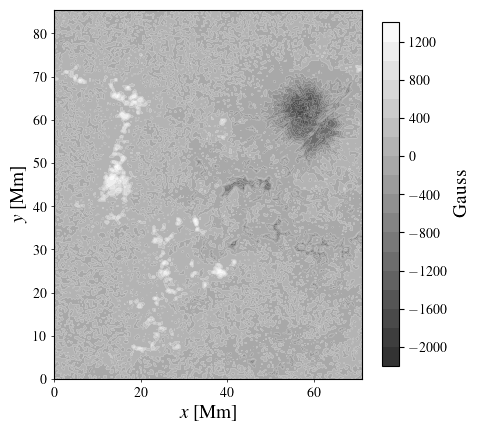

In [7]:
plot_magnetogram_2D(data2d)

##### Extrapolate magnetic field and save as .pkl in folder /extra_data

Can be commented out once calculated. Then only following code block is needed.

In [ ]:
data3d = calculate_magfield(
    data2d,
    alpha=0.01,
    a=0.2,
    which_solution=WhichSolution.ASYMP,
    b=1.0,
    z0=2.0,
    deltaz=0.2,
)

if not os.path.exists("extra_data"):
        os.makedirs("extra_data")

data3d.save(path="extra_data/")

##### Load Field3dData object

In [ ]:
data3d = Field3dData.load(path="extra_data")

##### Plot

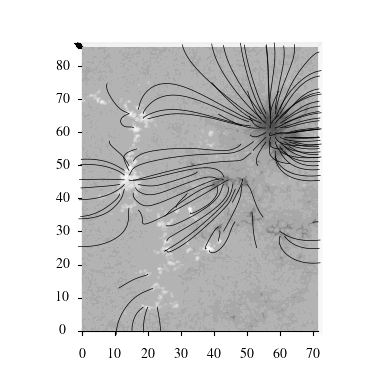

In [ ]:
plot_magnetogram_3D(data3d, view="los", footpoints="active-regions")

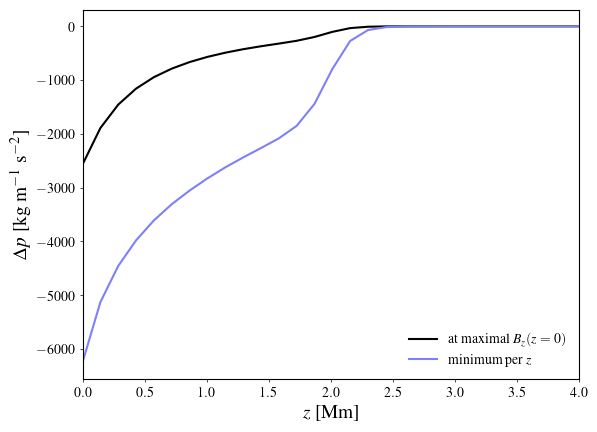

In [ ]:
plot_dpressure_z(data3d)

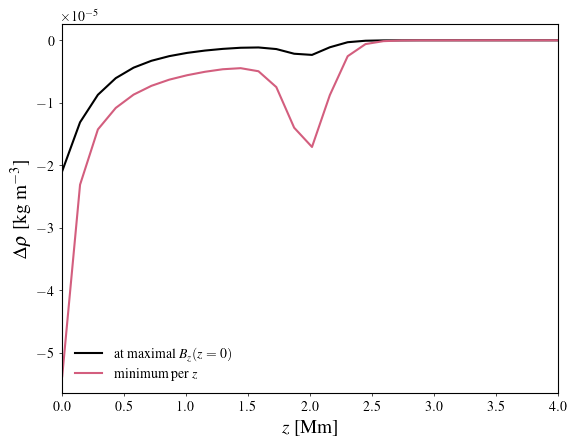

In [ ]:
plot_ddensity_z(data3d)

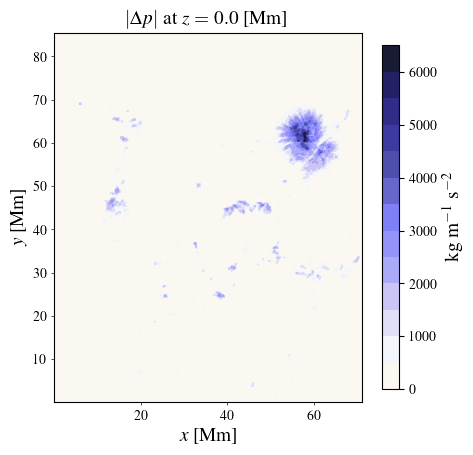

In [ ]:
plot_dpressure_xy(data3d, z=0)

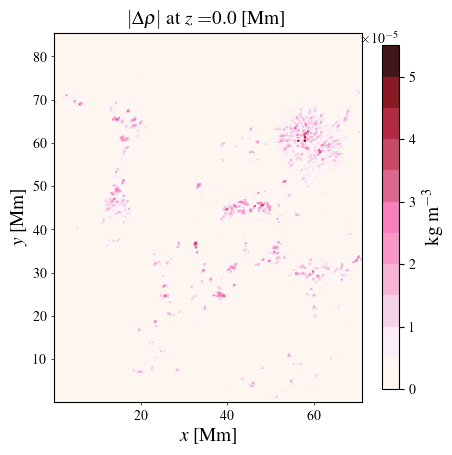

In [ ]:
plot_ddensity_xy(data3d, z=0)